In [1]:
library("plotly")

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
set.seed(123)

x <- rnorm(1000)
y <- rchisq(1000, df = 1, ncp = 0)
group <- sample(LETTERS[1:5], size = 1000, replace = T)
size <- sample(1:5, size = 1000, replace = T)

In [3]:
ds <- data.frame(x, y, group, size)

In [4]:
p <- plot_ly(ds, x = x, y = y, mode = "markers", split = group, size = size) %>% layout(title = "Scatter Plot")

In [5]:
embed_notebook(p)

No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter


In [6]:
library(plotly)

dsamp <- diamonds[sample(nrow(diamonds), 1000), ]
p <- qplot(carat, price, data=dsamp, colour=clarity)
embed_notebook(p)

In [7]:
# Filled Line Chart
library(plotly)
library(PerformanceAnalytics)

#Load data
data(managers)

# Convert to data.frame
managers.df <- as.data.frame(managers)
managers.df$Dates <- index(managers)

# See first few rows
head(managers.df)

# Plot
p <- plot_ly(managers.df, x = managers.df$Dates, y = managers.df$HAM1, type = "scatter", mode = "lines", name = "Manager 1", fill = "tonexty") %>%
  layout(title = "Time Series plot")
embed_notebook(p)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



,HAM1,HAM2,HAM3,HAM4,HAM5,HAM6,EDHEC LS EQ,SP500 TR,US 10Y TR,US 3m TR,Dates
1996-01-31,0.0074,NA,0.0349,0.0222,NA,NA,NA,0.0340,0.00380,0.00456,1996-01-31
1996-02-29,0.0193,NA,0.0351,0.0195,NA,NA,NA,0.0093,-0.03532,0.00398,1996-02-29
1996-03-31,0.0155,NA,0.0258,-0.0098,NA,NA,NA,0.0096,-0.01057,0.00371,1996-03-31
1996-04-30,-0.0091,NA,0.0449,0.0236,NA,NA,NA,0.0147,-0.01739,0.00428,1996-04-30
1996-05-31,0.0076,NA,0.0353,0.0028,NA,NA,NA,0.0258,-0.00543,0.00443,1996-05-31
1996-06-30,-0.0039,NA,-0.0303,-0.0019,NA,NA,NA,0.0038,0.01507,0.00412,1996-06-30


In [8]:

# Heatmap
library(plotly)
library(mlbench)

# Get Sonar data
data(Sonar)

# Use only numeric data
rock <- as.matrix(subset(Sonar, Class == "R")[,1:59])
mine <- as.matrix(subset(Sonar, Class == "M")[,1:59])

# For rocks
p1 <- plot_ly(z = rock, type = "heatmap", showscale = F)

# For mines
p2 <- plot_ly(z = mine, type = "heatmap", name = "test") %>%
  layout(title = "Mine vs Rock")

# Plot together
p3 <- subplot(p1, p2)
embed_notebook(p3)

In [9]:
library(plotly)

# initiate a 100 x 3 matrix filled with zeros
m <- matrix(numeric(300), ncol = 3)

# simulate a 3D random-walk
for (i in 2:100) m[i, ] <- m[i-1, ] + rnorm(3)

# collect everything in a data-frame
df <- setNames(
  data.frame(m, seq(1, 100)), 
  c("x", "y", "z", "time")
)

# create the plotly
p <- plot_ly(df, x = df$x, y = df$y, z = df$z, color = time, type = "scatter3d")
    
embed_notebook(p)

No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode


In [10]:
library(plotly)
# Note that volcano is a numeric matrix that ships with R
plot_ly(z = volcano, type = "surface")


# 2D kernel density estimation
kd <- with(MASS::geyser, MASS::kde2d(duration, waiting, n = 50))
p <- plot_ly(x = kd$x, y = kd$y, z = kd$z) %>% add_surface()

HTML widgets cannot be represented in plain text (need html)


Attaching package: ‘ggmap’

The following object is masked from ‘package:plotly’:

    wind

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Lille,France&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lille,France&sensor=false


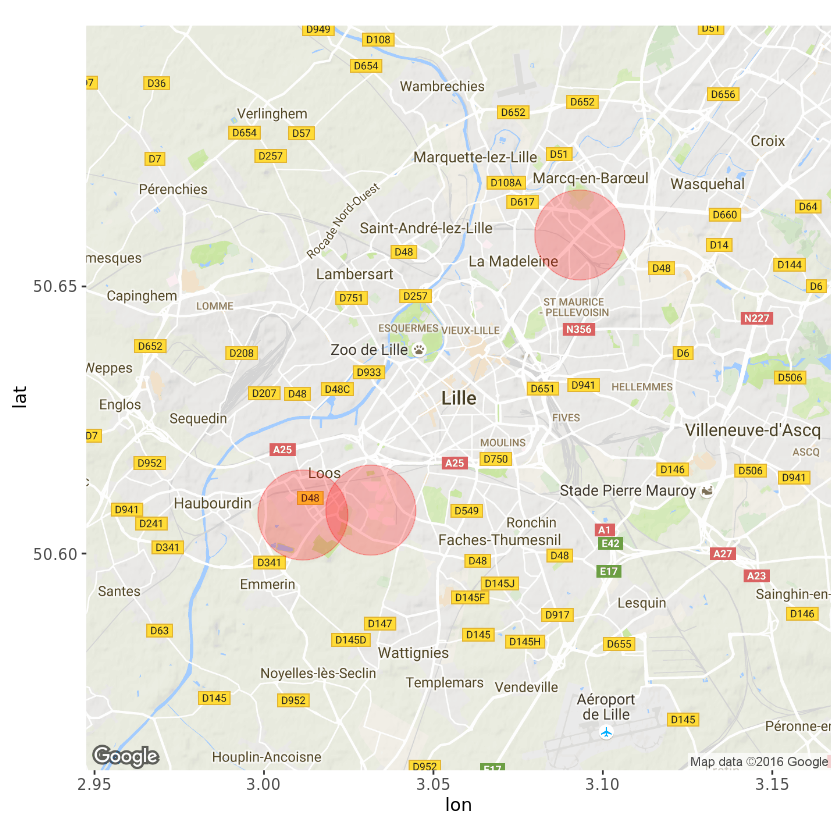

In [11]:
library(ggplot2)
library(ggmap)

d <- data.frame(lat=c(50.659631, 50.607213, 50.608129),
                lon=c(3.09319, 3.011473, 3.031529))

Lille <- get_map("Lille,France", zoom=12)

p <- ggmap(Lille)
p + geom_point(data=d, aes(x=lon, y=lat), color="red", size=25, alpha=0.25)

In [12]:
library(rgeos)
library(sp)
library(ggmap)

data = data.frame(
    ID = as.numeric(c(1:8)),
    longitude = as.numeric(c(-63.27462, -63.26499, -63.25658, -63.2519, -63.2311, -63.2175, -63.23623, -63.25958)),
    latitude = as.numeric(c(17.6328, 17.64614, 17.64755, 17.64632, 17.64888, 17.63113, 17.61252, 17.62463))
)
d <- SpatialPointsDataFrame(coords = data[, -1], data = data, proj4string = CRS("+init=epsg:4326"))
d_mrc <- spTransform(d, CRS("+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +no_defs"))

rgeos version: 0.3-21, (SVN revision 540)
 GEOS runtime version: 3.5.0-CAPI-1.9.0 r4084 
 Linking to sp version: 1.2-3 
 Polygon checking: TRUE 



In [13]:
d_mrc_bff_mrc <- gBuffer(d_mrc, byid = TRUE, width = 250, quadsegs = 10)

Regions defined for each Polygons
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=17.631598,-63.247593&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 1 rows containing missing values (geom_rect).”

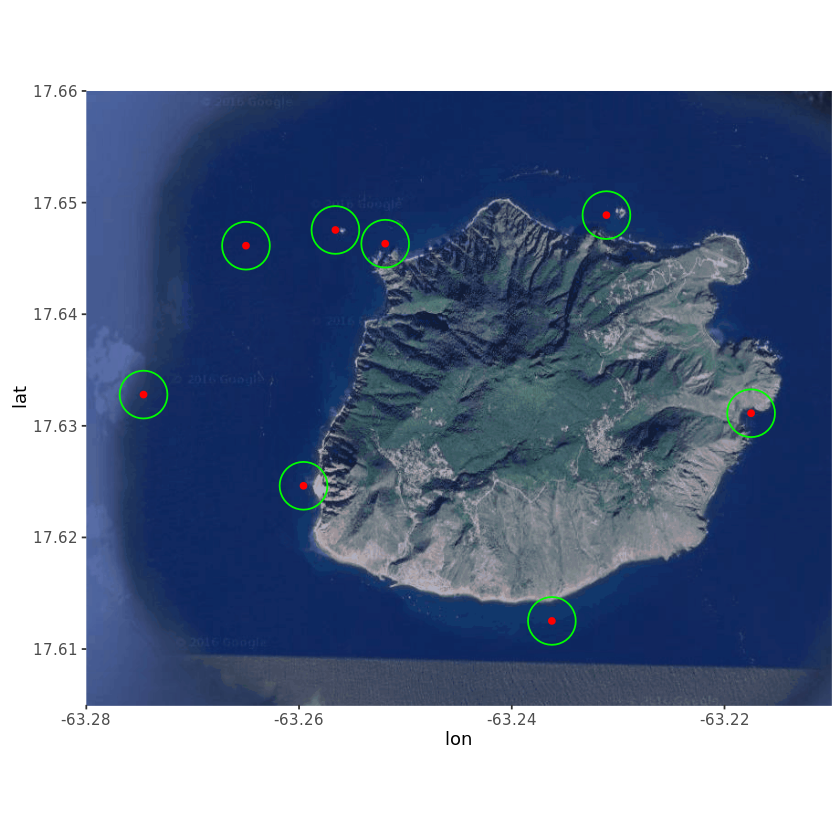

In [14]:
d_mrc_bff <- spTransform(d_mrc_bff_mrc, CRS("+init=epsg:4326"))
d_mrc_bff_fort <- fortify(d_mrc_bff)

island = get_map(location = c(lon = -63.247593, lat = 17.631598), zoom = 13, maptype = "satellite")
islandMap = ggmap(island, extent = "panel", legend = "bottomright")
RL = geom_point(aes(x = longitude, y = latitude), data = data, color = "#ff0000")
islandMap + 
RL + 
geom_path(data=d_mrc_bff_fort, aes(long, lat, group=group), color="green") +
scale_x_continuous(limits = c(-63.280, -63.21), expand = c(0, 0)) + 
scale_y_continuous(limits = c(17.605, 17.66), expand = c(0, 0)) 